In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import csv
reader = csv.reader(open("hepatitis_2_csv.csv", "r"))
x = list(reader)
res = np.array(x).astype("float")

In [3]:
training_class_name=res[0:568,19:20];
training_data=res[0:568,0:19];
training_data=np.matrix(training_data)
training_class_name=np.matrix(training_class_name)

In [85]:
class Unit:
    
    def __init__(self,activation):
        # self.activation="sigmoid"
        self.activation=activation
        print("Activation set as {}".format(self.activation))
        
    def sigmoid(self,X):
        return 1/(1+np.exp(-X));
  
    def tanh(self,X):
        return np.tanh(X);

    def relu(self,X):
        return np.maximum(0, X);
        
    def getActivation(self):
        # plot the activation function using matplotlib library
        cur_axes = plt.gca()
        # to remove the x axis
        cur_axes.axes.get_xaxis().set_visible(False)
        rangex=np.linspace(-10, 10, 100)
        
        if(self.activation=="sigmoid"):
            plt.plot(rangex,self.sigmoid(rangex))
        elif(self.activation=="tanh"):
            plt.plot(rangex,self.tanh(rangex))
        elif(self.activation=="relu"):
            plt.plot(rangex,self.relu(rangex))
        plt.title("activation function = "+self.activation)
        
    def train(self,epochs,inputmatrix,outputmatrix):
        self.weights=0.01*np.random.rand(inputmatrix.shape[1],1)
        self.trainingOutput=[]
        self.correctOutput=[]
        self.epochs=np.linspace(0,epochs,outputmatrix.shape[0])
        for i in range(0,epochs):
            val=self.output(inputmatrix,outputmatrix,i)
            self.trainingOutput.append(val)
            self.correctOutput.append(outputmatrix)
            
        self.trainingOutput=np.asarray(self.trainingOutput)
        self.correctOutput=np.asarray(self.correctOutput)
            
    def output(self,inputmatrix,outputmatrix,iterno):
        self.ipv=np.dot(inputmatrix,self.weights)
        self.result=self.sigmoid(self.ipv)
        cost=self.costfunc(inputmatrix,outputmatrix)
        print("cost for {} iteration is {}".format(iterno,cost))
        self.optimization(0.1,inputmatrix,outputmatrix)
        return self.result
        
    def costfunc(self,inputmatrix,outputmatrix):
        A1=np.multiply(outputmatrix,np.log(self.result))
        A2=np.multiply((1-outputmatrix),np.log((1-self.result)))
        cost=A1+A2
        cost=(-1/len(inputmatrix))*cost
        cost=np.sum(cost)
        return cost
    
    def optimization(self,learningRate,inputmatrix,outputmatrix):
        delta=((learningRate/len(self.weights))*np.matmul(inputmatrix.transpose(),np.subtract(self.result,outputmatrix)))
        self.weights=self.weights-delta
                                    
    def parameters(self):
        parameters={"weights":self.weights,"activation":self.activation}
        print("Weights = {}".format(parameters["weights"]))
        print("activation = {}".format(parameters["activation"]))
        return parameters
    
    def predict(self,inp):
        self.intake=np.dot(inp,self.weights)
        if(self.activation=="sigmoid"):
            self.out=self.sigmoid(self.intake)
        elif(self.activation=="tanh"):
            self.out=self.tanh(self.intake)
        elif(self.activation=="relu"):
            self.out=self.relu(self.intake)
        return self.out
    
    def results(self):
        accuracy=self.correctOutput - self.trainingOutput
        print(accuracy)
        #print(len(self.epochs.shape))
        #plt.plot(accuracy,self.epochs)
        
    @classmethod
    def info(cls):
        print("This is a neural network unit which takes the output of previous unit and corresponding weights.\n It takes the product of both and is passes on to the activation function to get the output")
        
    

In [86]:
u1=Unit(activation="relu")

Activation set as relu


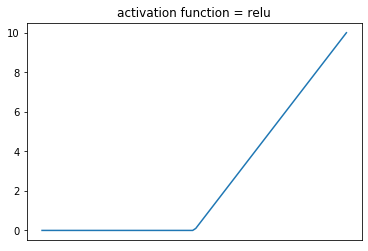

In [14]:
u1.getActivation()

In [7]:
meanData=training_data.mean()
varianceData=np.var(training_data)
training_data=(training_data-meanData)/varianceData

In [87]:
u1.train(10,training_data,training_class_name)

cost for 0 iteration is 0.69307438334747
cost for 1 iteration is 0.6906871310524714
cost for 2 iteration is 0.688333872929648
cost for 3 iteration is 0.6860141047330977
cost for 4 iteration is 0.6837273277098577
cost for 5 iteration is 0.6814730486635805
cost for 6 iteration is 0.6792507800110961
cost for 7 iteration is 0.6770600398320841
cost for 8 iteration is 0.6749003519120808
cost for 9 iteration is 0.6727712457790562


In [73]:
training_class_name.shape

(568, 1)

In [88]:
params=u1.results()

[[[ 0.50001715]
  [ 0.49993155]
  [ 0.49996375]
  ...
  [ 0.50003407]
  [ 0.50001748]
  [-0.49999539]]

 [[ 0.49876325]
  [ 0.49808452]
  [ 0.49837721]
  ...
  [ 0.49886846]
  [ 0.49879521]
  [-0.50131687]]

 [[ 0.49751774]
  [ 0.49625072]
  [ 0.49680155]
  ...
  [ 0.49771072]
  [ 0.49758117]
  [-0.50262923]]

 ...

 [[ 0.49141438]
  [ 0.48727835]
  [ 0.48908489]
  ...
  [ 0.49203854]
  [ 0.49163294]
  [-0.50905603]]

 [[ 0.49021821]
  [ 0.48552282]
  [ 0.4875735 ]
  ...
  [ 0.49092707]
  [ 0.49046734]
  [-0.51031475]]

 [[ 0.48903009]
  [ 0.48378013]
  [ 0.48607263]
  ...
  [ 0.48982315]
  [ 0.48930965]
  [-0.51156471]]]


In [51]:
output=u1.predict(training_data[0:1,0:19])
print(output)

[[0.04827737]]


In [52]:

class Layers:
    def __init__(self):
        pass
    class Deep:
        def __init__(self,numberOfUnits,otherdata):
            

SyntaxError: unexpected EOF while parsing (<ipython-input-52-4e99675331ea>, line 6)